# Data Diri

Nama     : Asis Rianto \
Email    : asisrianto2@gmail.com \
Username : [asisrianto](https://www.dicoding.com/users/asisrianto)

---

Dataset : [Tweet Sentiment Dataset](https://www.kaggle.com/datasets/saurabhshahane/twitter-sentiment-dataset/)

# Import The Libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import GridSearchCV
import time
import matplotlib.pyplot as plt

# DATA PREPARATION

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Twitter_Data.csv')

In [ ]:
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [ ]:
df = df.astype(str)

In [ ]:
category = pd.get_dummies(df.category)
df_new = pd.concat([df, category], axis=1)
df_new = df_new.drop(columns='category')
df_new

,clean_text,-1.0,0.0,1.0,nan
0,when modi promised “minimum government maximum...,1,0,0,0
1,talk all the nonsense and continue all the dra...,0,1,0,0
2,what did just say vote for modi welcome bjp t...,0,0,1,0
3,asking his supporters prefix chowkidar their n...,0,0,1,0
4,answer who among these the most powerful world...,0,0,1,0
...,...,...,...,...,...
162975,why these 456 crores paid neerav modi not reco...,1,0,0,0
162976,dear rss terrorist payal gawar what about modi...,1,0,0,0
162977,did you cover her interaction forum where she ...,0,1,0,0
162978,there big project came into india modi dream p...,0,1,0,0


In [ ]:
df_new.rename(
    columns=({'-1.0':'negative','0.0':'neutral','1.0':'positive'}),
    inplace=True,
)
df_new

,clean_text,negative,neutral,positive,nan
0,when modi promised “minimum government maximum...,1,0,0,0
1,talk all the nonsense and continue all the dra...,0,1,0,0
2,what did just say vote for modi welcome bjp t...,0,0,1,0
3,asking his supporters prefix chowkidar their n...,0,0,1,0
4,answer who among these the most powerful world...,0,0,1,0
...,...,...,...,...,...
162975,why these 456 crores paid neerav modi not reco...,1,0,0,0
162976,dear rss terrorist payal gawar what about modi...,1,0,0,0
162977,did you cover her interaction forum where she ...,0,1,0,0
162978,there big project came into india modi dream p...,0,1,0,0


In [ ]:
df = df_new.drop(columns='nan')
df

,clean_text,negative,neutral,positive
0,when modi promised “minimum government maximum...,1,0,0
1,talk all the nonsense and continue all the dra...,0,1,0
2,what did just say vote for modi welcome bjp t...,0,0,1
3,asking his supporters prefix chowkidar their n...,0,0,1
4,answer who among these the most powerful world...,0,0,1
...,...,...,...,...
162975,why these 456 crores paid neerav modi not reco...,1,0,0
162976,dear rss terrorist payal gawar what about modi...,1,0,0
162977,did you cover her interaction forum where she ...,0,1,0
162978,there big project came into india modi dream p...,0,1,0


In [ ]:
features = df['clean_text'].values
labels = df[['negative','neutral','positive']].values

In [ ]:
feature_train, feature_test, label_train, label_test = train_test_split(features, labels, test_size=0.2)

# DATA PREPROCESSING


Tokenizer

In [ ]:
MAX_FEATURES = 10000
OOV_TOKEN = 'x'

tokenizer = Tokenizer(num_words=MAX_FEATURES, oov_token=OOV_TOKEN)
tokenizer.fit_on_texts(feature_train)
tokenizer.fit_on_texts(feature_test)

train_seq = tokenizer.texts_to_sequences(feature_train)
X_train = pad_sequences(train_seq)

test_seq = tokenizer.texts_to_sequences(feature_test)
X_test = pad_sequences(test_seq)

In [ ]:
y_train = label_train
y_test = label_test

In [ ]:
[X_train.shape, X_test.shape]

[(130384, 51), (32596, 52)]

In [ ]:
X_train = np.lib.pad(X_train, ((0,0),(X_test.shape[1] - X_train.shape[1],0)), 'constant', constant_values=(0))

In [ ]:
[X_train.shape, X_test.shape]

[(130384, 52), (32596, 52)]

# MODEL SELECTION

Architecture

In [ ]:
INPUT_DIM = 10000
OUTPUT_DIM = 32
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=INPUT_DIM, output_dim=OUTPUT_DIM),
    tf.keras.layers.LSTM(64, dropout=0.5, recurrent_dropout=0.2 ),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 349,187
Trainable params: 349,187
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Callbacks

In [ ]:
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath, monitor='val_loss',
    verbose=0,
    save_best_only=True,
    mode='auto'
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True
)

# TRAINING THE MODEL

In [22]:
NUM_EPOCHS = 5

start = time.time()
history = model.fit(X_train, y_train, 
                    epochs=NUM_EPOCHS, 
                    validation_data=(X_test, y_test),
                    callbacks=[model_checkpoint, early_stopping],  
                    verbose=2)
stop = time.time()
print(f'{stop-start}')

Epoch 1/5
4075/4075 - 289s - loss: 0.3363 - accuracy: 0.8790 - val_loss: 0.1543 - val_accuracy: 0.9543 - 289s/epoch - 71ms/step
Epoch 2/5
4075/4075 - 290s - loss: 0.1507 - accuracy: 0.9544 - val_loss: 0.1149 - val_accuracy: 0.9678 - 290s/epoch - 71ms/step
Epoch 3/5
4075/4075 - 283s - loss: 0.1193 - accuracy: 0.9650 - val_loss: 0.1094 - val_accuracy: 0.9685 - 283s/epoch - 69ms/step
Epoch 4/5
4075/4075 - 279s - loss: 0.1053 - accuracy: 0.9696 - val_loss: 0.1053 - val_accuracy: 0.9721 - 279s/epoch - 68ms/step
Epoch 5/5
4075/4075 - 281s - loss: 0.0948 - accuracy: 0.9721 - val_loss: 0.1007 - val_accuracy: 0.9723 - 281s/epoch - 69ms/step
1465.7501475811005


Visualization of accuracy and loss

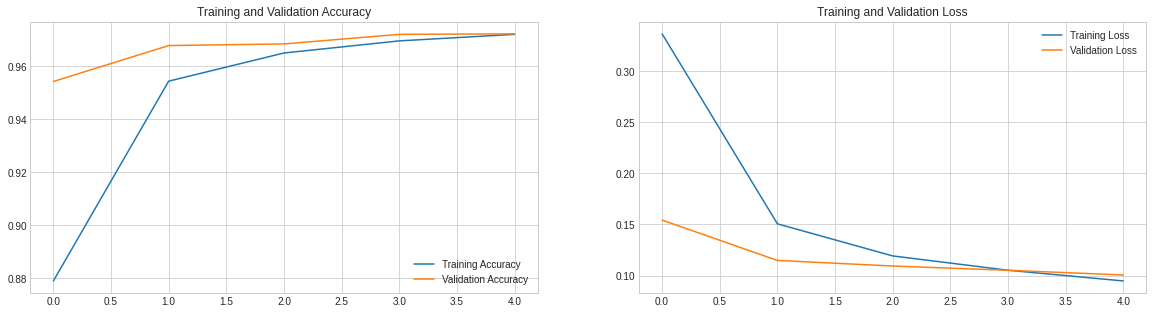

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.style.use('seaborn-whitegrid')
plt.subplots(1, 2, figsize=[20, 5])
plt.subplot(1,2,1)
acc = plt.plot(epochs, acc, label='Training Accuracy')
val_acc = plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.subplot(1,2,2)
loss = plt.plot(epochs, loss, label='Training Loss')
val_loss = plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc=0)

#plt.savefig('proposed_model.png')
plt.show()

# Save The Model

In [24]:
model.save("sentiment_analysis.h5")